In [84]:
from scipy.optimize import curve_fit
from scipy import stats
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image, IFrame, HTML
import scipy.constants as const
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [85]:
S = 4*np.pi*(22.5e-2)**2

In [86]:
0.5/22*S

0.014458466189816664

In [87]:
brez_si = pd.read_excel('podatki.ods',sheet_name=0)
brez_si['P_out [W]'] = (brez_si['P_out [mW]']-brez_si['P_out [mW]'][0])*S*10
brez_si

,U [V],P_in [W],P_out [mW],P_out [W]
0,10,0.38,0.58,0.000000
1,20,0.94,0.60,0.127235
2,30,1.58,0.63,0.318086
3,40,2.39,0.70,0.763407
4,50,3.30,0.80,1.399580
5,60,4.38,0.91,2.099369
6,70,5.56,1.04,2.926394
7,80,6.78,1.18,3.817035
8,90,8.09,1.33,4.771294
9,100,9.52,1.52,5.980022


In [88]:
z_si = pd.read_excel('podatki.ods',sheet_name=1)
z_si['P_out [W]'] = (z_si['P_out [mW]']-z_si['P_out [mW]'][0])*S*10
z_si

,U [V],P_in [W],P_out [mW],P_out [W]
0,10,0.36,0.57,0.000000
1,20,0.87,0.58,0.063617
2,30,1.61,0.61,0.254469
3,40,2.40,0.64,0.445321
4,50,3.27,0.68,0.699790
5,60,4.38,0.74,1.081493
6,70,5.50,0.80,1.463197
7,80,6.85,0.87,1.908518
8,90,8.10,0.93,2.290221
9,100,9.57,1.01,2.799159


In [89]:
x,y = brez_si['P_in [W]'],brez_si['P_out [W]']
x_si,y_si = z_si['P_in [W]'],z_si['P_out [W]']

In [90]:
def lin_fit(x,a,b):
    return a*x + b

In [91]:
params = curve_fit(lin_fit, x, y)
a,b = params[0]
errs = np.sqrt(np.diag(params[1]))

params_si = curve_fit(lin_fit, x_si, y_si)
a_si,b_si = params_si[0]
errs_si = np.sqrt(np.diag(params_si[1]))

In [92]:
a,errs[0],b,errs[1],'\n',a_si,errs_si[0],b_si,errs_si[1]

(0.8373102043893865,
 0.019517911725284564,
 -1.3950801897085037,
 0.2380517711003943,
 '\n',
 0.3238482458258392,
 0.0021452859408233327,
 -0.28016764987187626,
 0.026093517266614453)

In [93]:
x_theoretical = np.linspace(min(x)*0.9,max(x)*1.1)

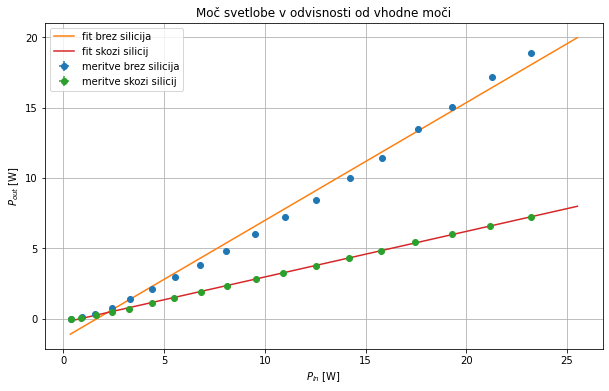

In [94]:
plt.errorbar(x, y,yerr=0.01*S*10, xerr=0.03,fmt='o',label=f'meritve brez silicija')
plt.plot(x_theoretical,lin_fit(x_theoretical,a,b),label=f'fit brez silicija')
plt.errorbar(x_si, y_si,yerr=0.01*S*10, xerr=0.03,fmt='o',label=f'meritve skozi silicij')
plt.plot(x_theoretical,lin_fit(x_theoretical,a_si,b_si),label=f'fit skozi silicij')
#plt.plot(x_theoretical, y_theoretical,label=f'$kx+c$')

plt.title('Moč svetlobe v odvisnosti od vhodne moči')

plt.legend()
plt.grid()

plt.xlabel("$P_{in}$ [W]")
plt.ylabel("$P_{out}$ [W]")

#plt.savefig('moc.png',dpi=200,bbox_inches='tight')

plt.show()

Drugi del

In [134]:
S_0 = 30/2700**4/const.sigma

brez_si['T'] = (brez_si['P_out [W]']/const.sigma/S_0)**(1/4)
brez_si['R'] = brez_si['U [V]']**2/brez_si['P_in [W]']

x,y = brez_si['T'][1:],brez_si['R'][1:]

In [135]:
params = curve_fit(lin_fit, x,y)
a,b = params[0]
errs = np.sqrt(np.diag(params[1]))
a,errs[0],b,errs[1],

(0.5509259195106365,
 0.005441188282538867,
 63.55862942215846,
 9.735953187575761)

In [136]:
x_theoretical = np.linspace(min(x)*0.9,max(x)*1.1)

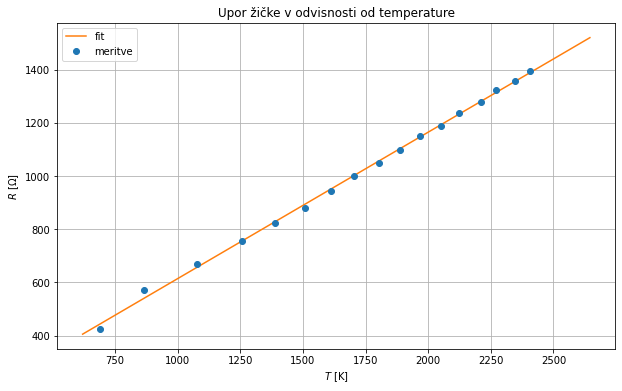

In [137]:
plt.errorbar(x,y,fmt='o',label='meritve')
plt.plot(x_theoretical,lin_fit(x_theoretical,a,b),label=f'fit')

plt.title('Upor žičke v odvisnosti od temperature')

plt.legend()
plt.grid()

plt.xlabel("$T$ [K]")
plt.ylabel("$R$ [$\Omega$]")

plt.savefig('upor.png',dpi=200,bbox_inches='tight')

plt.show()

3 del

In [148]:
brez_si['T']

0        0.000000
1      689.024516
2      866.402460
3     1078.381645
4     1254.824084
5     1388.691127
6     1508.921454
7     1612.556678
8     1705.071092
9     1804.093904
10    1889.064499
11    1967.614824
12    2050.935907
13    2122.243938
14    2210.859483
15    2270.937471
16    2348.648996
17    2405.283587
Name: T, dtype: float64

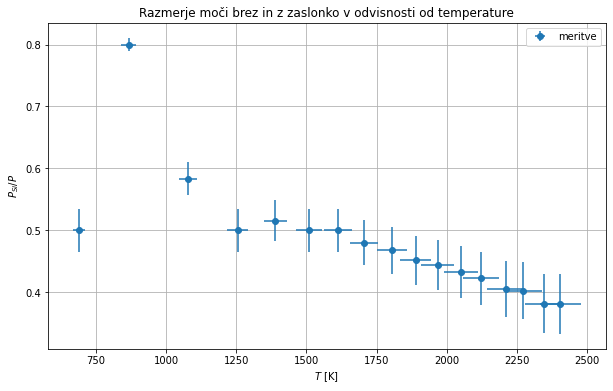

In [156]:
x,y = brez_si['T'],z_si['P_out [W]']/brez_si['P_out [W]']

plt.errorbar(x,y,xerr=x*0.03,yerr=np.log(y)*0.05,fmt='o',label='meritve')

plt.title('Razmerje moči brez in z zaslonko v odvisnosti od temperature')

plt.legend()
plt.grid()

plt.xlabel("$T$ [K]")
plt.ylabel("$P_{Si}/P$")

plt.savefig('razmerje.png',dpi=200,bbox_inches='tight')

plt.show()

In [152]:
z_si['P_out [W]'],brez_si['P_out [W]']

(0     0.000000
 1     0.063617
 2     0.254469
 3     0.445321
 4     0.699790
 5     1.081493
 6     1.463197
 7     1.908518
 8     2.290221
 9     2.799159
 10    3.244480
 11    3.753418
 12    4.325973
 13    4.834911
 14    5.471084
 15    6.043639
 16    6.552577
 17    7.188749
 Name: P_out [W], dtype: float64,
 0      0.000000
 1      0.127235
 2      0.318086
 3      0.763407
 4      1.399580
 5      2.099369
 6      2.926394
 7      3.817035
 8      4.771294
 9      5.980022
 10     7.188749
 11     8.461094
 12     9.987908
 13    11.451105
 14    13.486857
 15    15.013671
 16    17.176658
 17    18.894324
 Name: P_out [W], dtype: float64)